In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [3]:
df =pd.read_csv("/content/drive/MyDrive/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.columns
df.drop(columns = ['PassengerId','Name','Ticket','Fare','Cabin'], inplace = True)
df.dropna(inplace = True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
889,1,1,male,26.0,0,0,C


In [7]:
df['Alone']=(df['Parch']+df['SibSp']).apply(lambda x: 1 if x==0 else 0)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Alone
0,0,3,male,22.0,1,0,S,0
1,1,1,female,38.0,1,0,C,0
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,0
4,0,3,male,35.0,0,0,S,1
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q,0
886,0,2,male,27.0,0,0,S,1
887,1,1,female,19.0,0,0,S,1
889,1,1,male,26.0,0,0,C,1


<Axes: xlabel='Sex', ylabel='Survived'>

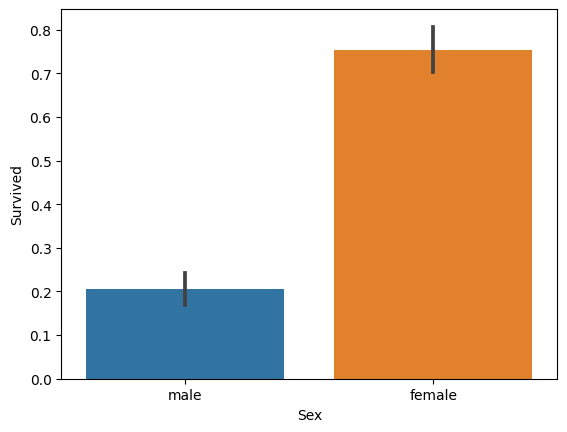

In [8]:
import seaborn as sns
sns.barplot(x='Sex', y='Survived',data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

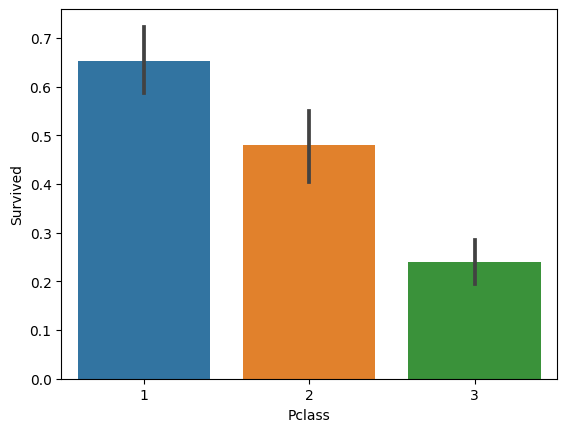

In [9]:
sns.barplot(x='Pclass', y='Survived',data=df)

In [10]:
df_cont1=pd.crosstab(index=df['Sex'],columns=df['Survived'])
df_cont1

Survived,0,1
Sex,,
female,64,195
male,360,93


In [11]:
df_cont2=pd.crosstab(index=df['Alone'],columns=df['Survived'])
df_cont2

Survived,0,1
Alone,,
0,150,160
1,274,128


In [12]:
r=df_cont1.shape[0]

In [13]:
c=df_cont1.shape[1]

In [14]:
df_cont1.shape

(2, 2)

In [15]:
degree_of_freedom = (r-1)*(c-1)
print(degree_of_freedom)

1


In [16]:
df_cont1=pd.crosstab(index=df['Sex'],columns=df['Survived'])
df_cont1.loc[:,'Total']=df_cont1.sum(axis=1)
df_cont1.loc['Total']=df_cont1.sum()
df_cont1

Survived,0,1,Total
Sex,,,
female,64,195,259
male,360,93,453
Total,424,288,712


In [17]:
df_exp=df_cont1.copy()
df_exp

Survived,0,1,Total
Sex,,,
female,64,195,259
male,360,93,453
Total,424,288,712


In [18]:
x=df_cont1.sum(1).values/2
x

array([259., 453., 712.])

In [19]:
y=df_cont1.sum().values/2
y

array([424., 288., 712.])

In [20]:
np.outer(x,y)

array([[109816.,  74592., 184408.],
       [192072., 130464., 322536.],
       [301888., 205056., 506944.]])

In [21]:
x_y=np.outer(x,y)
x_y

array([[109816.,  74592., 184408.],
       [192072., 130464., 322536.],
       [301888., 205056., 506944.]])

In [22]:
total=df_cont1.iloc[2,2]
total

712

In [23]:
x_y/total

array([[154.23595506, 104.76404494, 259.        ],
       [269.76404494, 183.23595506, 453.        ],
       [424.        , 288.        , 712.        ]])